## Robot Learning

## Assignment 2

#### Group names: Kaywan, Nicolas, Deepak Badarinath

### Introduction


Please read the theoretical questions and practical tasks below, and answer them in a text or code cell as suitable.

### Task 6

List the components of a *Markov Decision Process* (MDP) and give a short explanation for each.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

#### Answer

Your answer to the above question goes here.

### Task 7

Recall the state transition diagram for the Recycling Robot discussed in the lecture:

<img src="state_diagram_new.png" alt="Transition Table" title="Transition Table for the recycling robot" width="650"/>
    
   
In the markdown cell below, fill in the missing values for $P_{ss'}^{a}$ and $R_{ss'}^{a}$ in the table.
    

<div style="text-align: right; font-weight:bold"> 3 Points </div>

#### Answer

Your answer to the above question goes here.

| Current State | Next State | Action | Transition Probability | Expected Reward |
|:-------------:|:-----------:|:---------:|:-----------------------:|:----------------:|
| $s$           | $s'$        | $a$       | $P_{ss'}^{a}$           | $R_{ss'}^{a}$    |
| *low*         | *low*       | *search*  |           ?             |        ?         |
| *low*         | *high*      | *wait*    |           ?             |        ?         |
| *low*         | *low*       | *recharge*|           ?             |        ?         |

### Task 8

Derive the Bellman Equation for $V^{\pi}$:

$$V^{\pi}(s) = \sum_a \pi(s,a) \sum_{s'} P_{ss'}^{a} [R_{ss'}^{a} + \gamma V^{\pi}(s')]$$

You can start at the definition

$$V^{\pi}(s) = \mathbb{E}_{\pi}[R_t | s_t = s]$$

<div style="text-align: right; font-weight:bold"> 4 Points </div>

#### Answer
$$V^{\pi}(s) = \mathbb{E}_{\pi}[R_t | s_t = s]$$ Conditioning over $a_t$


$$V^{\pi}(s) = \sum_a \pi(s,a) \mathbb{E}_{\pi}[R_t | s_t = s,a_t = a]$$  Conditioning over $s_{t+1}$

$$V^{\pi}(s) = \sum_a \pi(s,a) \sum_{s'} P_{ss'}^{a} \mathbb{E}_{\pi}[R_t | s_t = s,a_t = a,s_{t+1}=s']$$

$$\mathbb{E}_{\pi}[R_t | s_t = s,a_t = a,s_{t+1}=s'] = \mathbb{E}_{\pi}[r_t + \gamma r_{t+1} + ... | s_t = s,a_t = a,s_{t+1}=s']  (**)$$


$$\mathbb{E}_{\pi}[r_t| s_t = s,a_t = a,s_{t+1}=s'] = R_{ss'}^{a}$$

By Markov property, we have that

$$\mathbb{E}_{\pi}[ r_{t+1} + \gamma r_{t+2} + ... | s_t = s,a_t = a,s_{t+1}=s'] = \mathbb{E}_{\pi}[ r_{t+1} + \gamma r_{t+2} + ... |s_{t+1}=s']$$

$$\mathbb{E}_{\pi}[ r_{t+1} + \gamma r_{t+2} + ... |s_{t+1}=s'] = V^{\pi}(s')$$

So (**) now becomes

$$\mathbb{E}_{\pi}[R_t | s_t = s,a_t = a,s_{t+1}=s'] = R_{ss'}^{a} + \gamma V^{\pi}(s')$$

Plugging it in (*) we get 


$$V^{\pi}(s) = \sum_a \pi(s,a) \sum_{s'} P_{ss'}^{a} [R_{ss'}^{a} + \gamma V^{\pi}(s')]$$

### Task 9

Softmax action selection and $\varepsilon$-greedy action selection are two strategies to encourage exploration in the action selection process of an agent.

Which of those two would you prefer for implementing the policy of an agent?
Give at least two arguments for your choice.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

#### Answer

Your answer to the above question goes here.

### Task 10

Regard the following function, which implements a low-pass filter:

$$z(k+1) = z(k)+\alpha[x-z(k)]$$

By completing the code cell below, depict the development of $z(k)$ when $z(0) = 0.1$ and $x = 1.0$ and $\alpha = 0.05$ for $500$ time steps $k$.                 

Also by completing the code cell below, implement the case that $x$ is time dependent; specifically that $x(k)$ is a periodic function with period 200 defined by

$$x(k)= 
\begin{cases}
    0,& \text{if } k < 100\\
    1,              & \text{otherwise}
\end{cases}$$

If you would like to use your own code instead of the templates below, feel free to do so instead, adding or removing cells as necessary!

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [11]:
#### Answer
#Your answer to the above question goes here.
import numpy as np
import matplotlib.pyplot as plt

#inputs: z - list, list of values on the trajectory of z so far
#        x - float, the most recently observed value x
#        alpha = float, filter constant


#output: z[k+1] - float, the next value on the trajectory of z

def step(z, x, alpha):
    
    #TODO: calculate and return z[k+1], you can use z[-1] to get z[k]
    
    z_new = z[-1]*(1-alpha) + alpha * x
    z.append(z_new)
    return z_new



#inputs: k - np.array, a numpy array of N equidistant time steps, shape (N,)
#        constant - Bool, whether to return constant values x=C or non-trivial function values x(k)


#output: x(k) - np.array, a numpy array with shape (N,). Make sure this has the same shape as k even in constant mode!


def x(k, constant):
    #constant x
    
    if constant:
        return np.ones(shape=(k.shape[0]))
        #TODO: return constant values x of correct shape
    
    #time dependent x(k)
    
    else:
        
        kmod200 = k % 200 #To get periodicity with period 200
        
        return (k>=100).astype('float32')
        
        
        #TODO: return x(k) as described in the task

Now, run the cell below (without modifying it) to present your results!

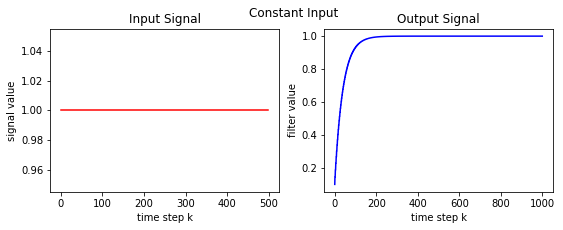

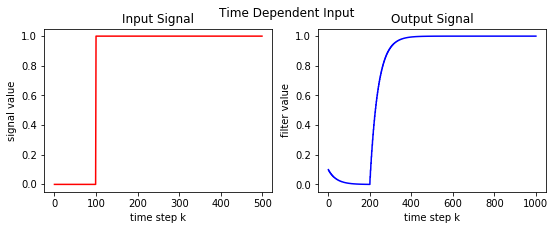

In [12]:
#You do not need to modify this cell.
#If your code above is fine you will get a visualization of your results from this cell.

#starting value for z
z_trajectory = [0.1]
#time-steps
k = np.arange(500)
#values x(k) for constant x
x_constant_trajectory = x(k=k, constant=True)
#simulate filter output for constant input signal
for x_value in x_constant_trajectory:
    z_next = step(z=z_trajectory, x=x_value, alpha=0.05)
    z_trajectory.append(z_next)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,3))
ax1.plot(x_constant_trajectory, c='r')
ax1.set_title('Input Signal')
ax1.set_xlabel('time step k')
ax1.set_ylabel('signal value')
ax2.plot(z_trajectory, c='b')
ax2.set_title('Output Signal')
ax2.set_xlabel('time step k')
ax2.set_ylabel('filter value')
fig.suptitle('Constant Input')
plt.show()

#time dependent system input
z_trajectory = [0.1]
x_trajectory = x(k=k, constant=False)
for x_value in x_trajectory:
    z_next = step(z=z_trajectory, x=x_value, alpha=0.05)
    z_trajectory.append(z_next)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,3))
ax1.plot(x_trajectory, c='r')
ax1.set_title('Input Signal')
ax1.set_xlabel('time step k')
ax1.set_ylabel('signal value')
ax2.plot(z_trajectory, c='b')
ax2.set_title('Output Signal')
ax2.set_xlabel('time step k')
ax2.set_ylabel('filter value')
fig.suptitle('Time Dependent Input')
plt.show()